# Ground State Chemical Potential and Energy in 2 Dimensions

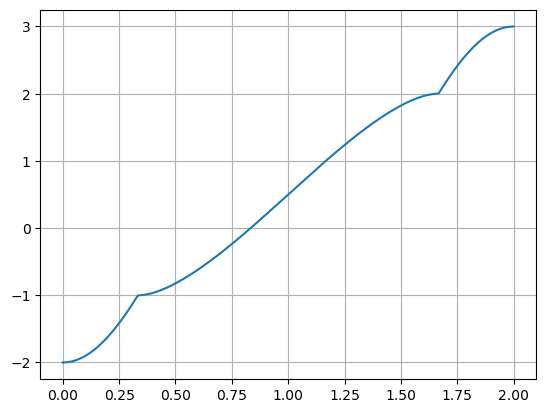

In [7]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

##

t = 1

def I_1(x):
    if np.abs(x) <= 2*t:
        result = np.heaviside(x + 2*t, 1) - (1 / np.pi) * np.arccos(x / (2*t))
    else:
        result = np.heaviside(x + 2*t, 1)
    return result
    
def rho_1d(mu, U):
    if U >= 0:
        return I_1(mu) + I_1(mu - U)
    elif U < 0:
        return 2 * I_1(mu - U/2)
    
def one_plot(x_array, y_array,x_label, y_label):
    plt.figure(dpi=100)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()
    

    